# Exploratory data analysis on scrapped ebay car sale data from Germany

In [1]:
import pandas as pd
pd.options.display.max_columns = 999

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
autos = pd.read_csv('autos.csv',encoding='Latin-1')
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## 20 columns by 50,000 entries
there seems to be some missing values in ['vehicleType', ' gearbox', 'model', 'fuelType', 'notRepairedDamage']


odometer column is in object --> int

In [4]:
# change column names form camelCase to snake_case
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
new_column_names = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']
autos.columns= new_column_names
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen'],
      dtype='object')

In [6]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-30 17:37:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


## It looks like 49999 entries in the seller column are private. we can scrape ths column.

same for offer_type.

odometer and price can be renamed and converted to int.

num_photos is odd (all zeros?)

In [7]:
# look into num_photos column
autos['num_photos'].value_counts()


0    50000
Name: num_photos, dtype: int64

In [8]:
# we will get rid of 3 columns cuz their values are just repititive
autos = autos.drop(['num_photos','seller','offer_type'],axis=1)
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [9]:
# covert price to integer type
autos['price'] = autos['price'].str.replace('$','')
autos['price'] = autos['price'].str.replace(',','').astype(int)

In [10]:
# convert odometer to int type
autos['odometer'] = (autos['odometer'].str.replace('km','').str.replace(',','')
                     .astype(int))
autos.rename({'odometer' : 'odometer_km'}, axis=1, inplace=True)

In [11]:
autos.head(3)

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37


count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

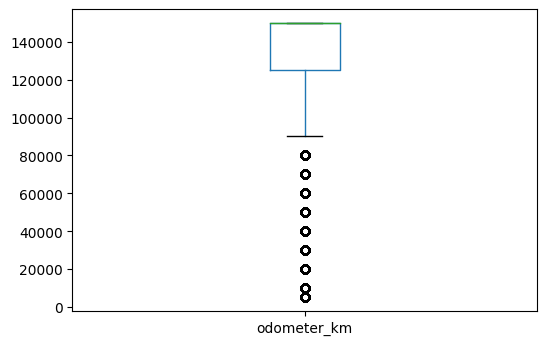

In [12]:
autos['odometer_km'].plot.box()
autos['odometer_km'].describe()

The values in odometer are rounded and there is more high milage vehicles than low milage. evident by the outliers in the box plot.

In [13]:
print(autos['price'].describe())
autos['price'].value_counts().head(20)

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64


0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
700      395
4500     394
300      384
2200     382
950      379
Name: price, dtype: int64

The values in the price column also seem to be rounded. moreover, there is 1421 values listed as zero.

In [14]:
autos['price'].value_counts().sort_index(ascending=False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

Up to 350,000 prices are increasing steadily but past that point prices seem to jump exponentially. ill remove rows with outliers above 350,000

In [15]:
autos = autos[autos.price.between(1,350000)]
autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,postal_code
count,48565.000000,48565.000000,48565.000000,48565.000000,48565.000000,48565.000000
mean,5888.935591,2004.755421,117.197158,125770.101925,5.782251,50975.745207
std,9059.854754,88.643887,200.649618,39788.636804,3.685595,25746.968398
min,1.000000,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1200.000000,1999.000000,71.000000,125000.000000,3.000000,30657.000000
50%,3000.000000,2004.000000,107.000000,150000.000000,6.000000,49716.000000
75%,7490.000000,2008.000000,150.000000,150000.000000,9.000000,71665.000000
max,350000.000000,9999.000000,17700.000000,150000.000000,12.000000,99998.000000


In [16]:
autos['registration_year'].value_counts(normalize=True).sort_index(ascending=False
                                                                  ).head(20)

9999    0.000062
9000    0.000021
8888    0.000021
6200    0.000021
5911    0.000021
5000    0.000082
4800    0.000021
4500    0.000021
4100    0.000021
2800    0.000021
2019    0.000041
2018    0.009678
2017    0.028663
2016    0.025121
2015    0.008072
2014    0.013652
2013    0.016535
2012    0.026974
2011    0.033419
2010    0.032719
Name: registration_year, dtype: float64

In [17]:
autos['registration_year'].value_counts(normalize=True).sort_index(ascending=True
                                                                  ).head(20)

1000    0.000021
1001    0.000021
1111    0.000021
1800    0.000041
1910    0.000103
1927    0.000021
1929    0.000021
1931    0.000021
1934    0.000041
1937    0.000082
1938    0.000021
1939    0.000021
1941    0.000041
1943    0.000021
1948    0.000021
1950    0.000062
1951    0.000041
1952    0.000021
1953    0.000021
1954    0.000041
Name: registration_year, dtype: float64

It seems that some vehicles have bee registered at the year 2800 and as low as 1800, which is clearly incorrect. lets check how many outside the bounds of 1910 and 2019. 

In [18]:
autos[autos.registration_year.between(1910,2019)].shape[0]/autos.shape[0]

0.9995881807886338

99% of the cars are registered within our defined year limits, so lets remove the rest.

In [19]:
autos = autos[autos.registration_year.between(1910,2019)]
autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,postal_code
count,48545.000000,48545.000000,48545.000000,48545.000000,48545.000000,48545.000000
mean,5888.431764,2003.461510,117.156123,125819.136883,5.783603,50975.125121
std,9059.345265,7.566196,200.385362,39723.379171,3.684938,25748.944248
min,1.000000,1910.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1200.000000,1999.000000,71.000000,125000.000000,3.000000,30657.000000
50%,3000.000000,2004.000000,107.000000,150000.000000,6.000000,49716.000000
75%,7490.000000,2008.000000,150.000000,150000.000000,9.000000,71665.000000
max,350000.000000,2019.000000,17700.000000,150000.000000,12.000000,99998.000000


In [21]:
autos['brand'].value_counts(normalize=True).head(40)

volkswagen        0.212813
bmw               0.108641
opel              0.108641
mercedes_benz     0.095787
audi              0.085858
ford              0.069667
renault           0.047894
peugeot           0.029457
fiat              0.025996
seat              0.018931
skoda             0.016068
nissan            0.015264
mazda             0.015223
smart             0.014296
citroen           0.014111
toyota            0.012586
hyundai           0.009950
sonstige_autos    0.009641
volvo             0.009043
mini              0.008611
mitsubishi        0.008178
honda             0.007993
kia               0.007107
alfa_romeo        0.006612
porsche           0.005912
suzuki            0.005891
chevrolet         0.005665
chrysler          0.003481
dacia             0.002657
daihatsu          0.002513
jeep              0.002204
subaru            0.002101
land_rover        0.002039
saab              0.001627
daewoo            0.001566
jaguar            0.001524
trabant           0.001380
r

Lets look at the top 5% car brands for sale on ebay.

In [25]:
brand_count = autos['brand'].value_counts(normalize=True)
common_brands = brand_count[brand_count>0.05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [27]:
brands_mean_price = {}
for brand in common_brands:
    mean = autos.loc[autos.brand == brand, 'price'].mean()
    brands_mean_price[brand]= mean
brands_mean_price

{'volkswagen': 5333.1962055948115,
 'bmw': 8261.382442169132,
 'opel': 2941.4664391353813,
 'mercedes_benz': 8526.623225806452,
 'audi': 9212.9306621881,
 'ford': 3728.4121821407452}

It seems than one average the highest prices are BMW Mercedes and Audi

In [29]:
brands_mean_milage = {}
for brand in common_brands:
    mean = autos.loc[autos.brand == brand, 'odometer_km'].mean()
    brands_mean_milage[brand]= mean
brands_mean_milage

{'volkswagen': 128955.570612719,
 'bmw': 132682.97307546454,
 'opel': 129452.02882062951,
 'mercedes_benz': 130848.3870967742,
 'audi': 129492.56238003839,
 'ford': 124349.49733885274}

lets compare the mean prices to the mean miles for each brand.

In [34]:
mean_prices = pd.Series(brands_mean_price).sort_values(ascending=False)
mean_milage = pd.Series(brands_mean_milage).sort_values(ascending=False)
top_car_info = pd.DataFrame(mean_prices,columns = ['mean_prices'])
top_car_info['mean_milage'] = mean_milage
top_car_info.head()

,mean_prices,mean_milage
audi,9212.930662,129492.562380
mercedes_benz,8526.623226,130848.387097
bmw,8261.382442,132682.973075
volkswagen,5333.196206,128955.570613
ford,3728.412182,124349.497339


Audi cars have the highest avg price and most cars are around 125k miles